In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
x = np.arange(0, 20, 1)
y = 1 + x**2

Text(0, 0.5, 'Y')

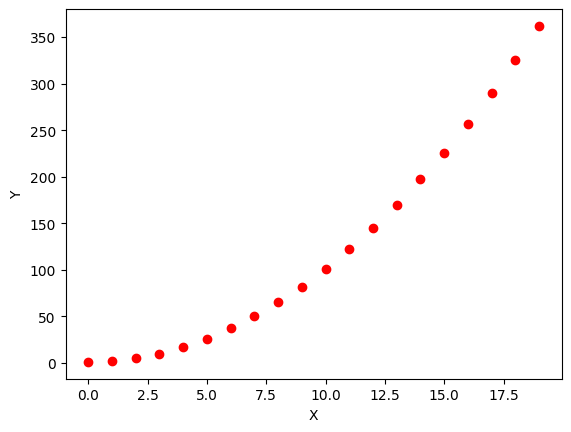

In [70]:
plt.scatter(x, y, c='red', marker='o', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')

In [71]:
X_train= np.c_[x,x**2, x**3] 
y_train = y

In [72]:
def compute_cost_multi_variable(X, y, w, b):
    m = X.shape[0]
    total_cost = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        total_cost += (f_wb - y[i]) ** 2
    total_cost = total_cost / (2 * m)
    return total_cost

In [73]:
def gradient_calculation(X, y, w, b):
    m,n= X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        error = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += error * X[i][j]
        dj_db += error
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [74]:
def gradient_descent_multi_variable(X, y, w_in, b_in, alpha, num_iters, gradient_calculation, compute_cost_multi_variable):
    J_history = []
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_calculation(X, y, w, b) 
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000:       
            J_history.append(compute_cost_multi_variable(X, y, w, b))
        
        if i%1000== 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w, b, J_history

In [ ]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
iterations = 100000
learning_rate = 0.0000001
w_final, b_final, J_history = gradient_descent_multi_variable(X_train, y_train, w_init, b_init, learning_rate, iterations, gradient_calculation, compute_cost_multi_variable)
print(f"Final weights:", w_final)
print(f"Final bias:", b_final)


Iteration    0: Cost  1161.86   
Iteration 1000: Cost   341.85   
Iteration 2000: Cost   291.81   
Iteration 3000: Cost   249.10   
Iteration 4000: Cost   212.64   
Iteration 5000: Cost   181.52   
Iteration 6000: Cost   154.96   
Iteration 7000: Cost   132.28   
Iteration 8000: Cost   112.93   
Iteration 9000: Cost    96.41   
Iteration 10000: Cost    82.30   
Iteration 11000: Cost    70.26   
Iteration 12000: Cost    59.99   
Iteration 13000: Cost    51.22   
Iteration 14000: Cost    43.73   
Iteration 15000: Cost    37.34   
Iteration 16000: Cost    31.88   
Iteration 17000: Cost    27.22   
Iteration 18000: Cost    23.25   
Iteration 19000: Cost    19.86   
Iteration 20000: Cost    16.96   
Iteration 21000: Cost    14.49   
Iteration 22000: Cost    12.38   
Iteration 23000: Cost    10.58   
Iteration 24000: Cost     9.04   
Iteration 25000: Cost     7.73   
Iteration 26000: Cost     6.61   
Iteration 27000: Cost     5.65   
Iteration 28000: Cost     4.83   
Iteration 29000: Cost   

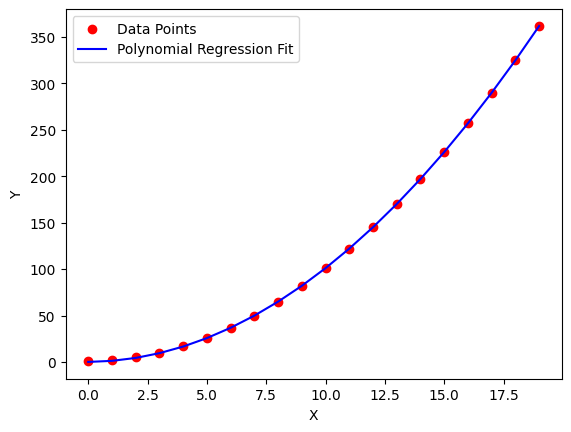

In [76]:
y_pred = X_train.dot(w_final) + b_final
plt.scatter(x, y, c='red', marker='o', label='Data Points')
plt.plot(x, y_pred, color='blue', label='Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()